In [1]:
from sklearn.svm import LinearSVC, SVC,LinearSVR,SVR
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GroupKFold
from sklearn.neural_network import MLPRegressor
from sklearn import linear_model
from scipy.stats import pearsonr
import seaborn as sns

In [6]:
df_fa = pd.read_csv(r'F:\Code\coupling\python\file\data\SDI_sub\sc_mode_1.csv')
df_md = pd.read_csv(r'F:\Code\coupling\python\file\data\SDI_sub\sc_mode_2.csv')
df_num = pd.read_csv(r'F:\Code\coupling\python\file\data\SDI_sub\sc_mode_3.csv')
df_label = pd.read_csv(r'F:\Code\coupling\python\file\data\SDI_sub\sc_mode_label.csv')
df_info = pd.read_csv(r'F:\Code\coupling\python\file\data\SDI_sub\sc_mode_info.csv')
df_mode= [df_fa,df_md,df_num]

In [13]:
from sklearn import tree
model_DecisionTreeRegressor = tree.DecisionTreeRegressor()
####3.2线性回归####
from sklearn import linear_model
model_LinearRegression = linear_model.LinearRegression()
####3.3SVM回归####
from sklearn import svm
model_SVR = svm.SVR()
####3.4KNN回归####
from sklearn import neighbors
model_KNeighborsRegressor = neighbors.KNeighborsRegressor()
####3.5随机森林回归####
from sklearn import ensemble
model_RandomForestRegressor = ensemble.RandomForestRegressor(n_estimators=20)#这里使用20个决策树
####3.6Adaboost回归####
from sklearn import ensemble
model_AdaBoostRegressor = ensemble.AdaBoostRegressor(n_estimators=50)#这里使用50个决策树
####3.7GBRT回归####
from sklearn import ensemble
model_GradientBoostingRegressor = ensemble.GradientBoostingRegressor(n_estimators=100)#这里使用100个决策树
####3.8Bagging回归####
from sklearn.ensemble import BaggingRegressor
model_BaggingRegressor = BaggingRegressor()
####3.9ExtraTree极端随机树回归####
from sklearn.tree import ExtraTreeRegressor
model_ExtraTreeRegressor = ExtraTreeRegressor()

model_MLPR = MLPRegressor(max_iter= 400)

model_list = [model_DecisionTreeRegressor, model_LinearRegression, model_SVR, model_KNeighborsRegressor,
              model_RandomForestRegressor, model_AdaBoostRegressor, model_GradientBoostingRegressor,
              model_BaggingRegressor, model_ExtraTreeRegressor,model_MLPR]

In [ ]:

r2_re = []
y_pred_3 = []
y_true_3 = []

r_list = []
p_list = []
mode = 0
#计算三种模态各个的分类性能
for mode in range(1):
    y_pred_mode = []
    y_true_mode = []
    #fig, ax = plt.subplots(figsize=(3, 3))
    #把fa和info合并成一个表格
    df_sc1= pd.concat([df_mode[mode],df_info],join="outer",axis=1)
    for i in range(7):
        center = i+1
        df = df_sc1.sample(frac=1).reset_index(drop=True)
        #df = df[df['label'] !=2]
        #df = df['label'].replace(3,0)
        
        #df.loc[df['label']==3,'label'] = 0
        df_test = df[df['center']== center].drop(axis=1,columns=['center','label'])
        df_train = df[df['center'] != center].drop(axis=1,columns=['center','label'])
        
        y_test = df_test['mmse'].values
        y_train = df_train['mmse'].values
        x_test = df_test.drop(axis=1,columns=['mmse']).values
        x_train = df_train.drop(axis=1,columns=['mmse']).values

        
        model = svm.SVR()
        model.fit(x_train,y_train)
        y_pred = model.predict(x_test)

        y_pred_mode.extend(y_pred)
        y_true_mode.extend(y_test)
        r2_re.append(pearsonr(y_pred,y_test)[0])

    y_pred_3.append(y_pred_mode)
    y_true_3.append(y_true_mode)
    r_list.append(pearsonr(y_pred_mode,y_true_mode)[0])
    p_list.append(pearsonr(y_pred_mode,y_true_mode)[0])

    fig, ax = plt.subplots(figsize=(8, 8))

    df_y = pd.DataFrame( data= np.transpose([y_pred_mode,y_true_mode]), columns=['pred','true'])
    

    sns.regplot(data= df_y, x='true',y= 'pred')
    
    modelName = str(model)

    #plt.scatter(y_true_mode,y_pred_mode)

    rp = pearsonr(y_pred_mode,y_true_mode)

    plt.xlim([0,35])
    plt.ylim([0,35])
    plt.title(modelName+', r= '+ str(rp[0]), +', p = '+ str(rp[1]))
    plt.show()





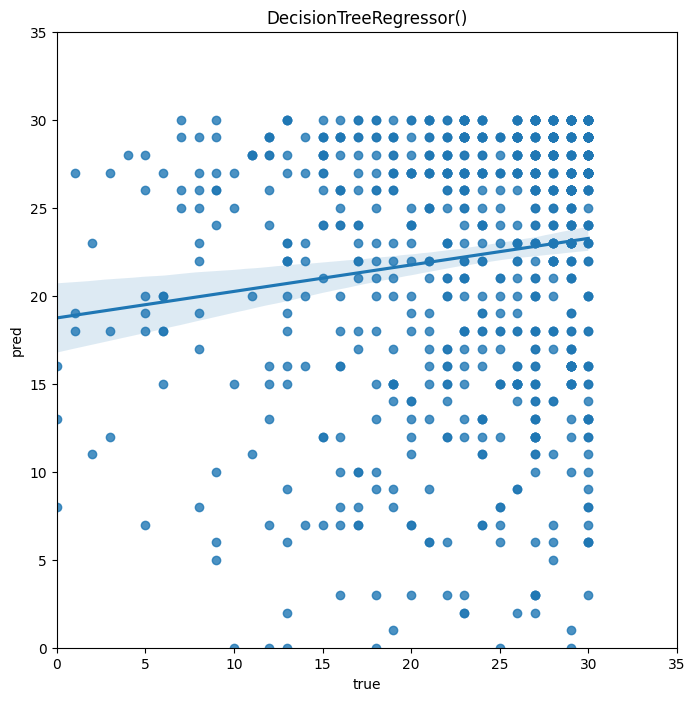

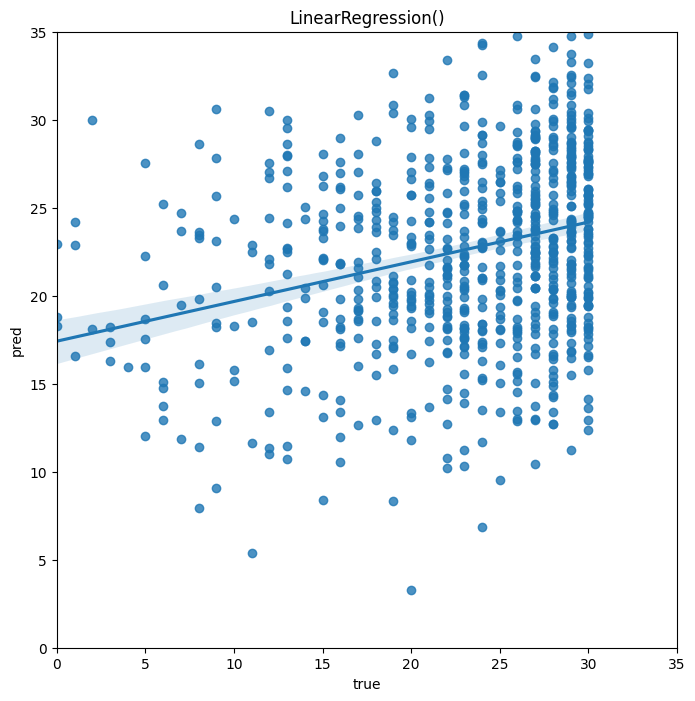

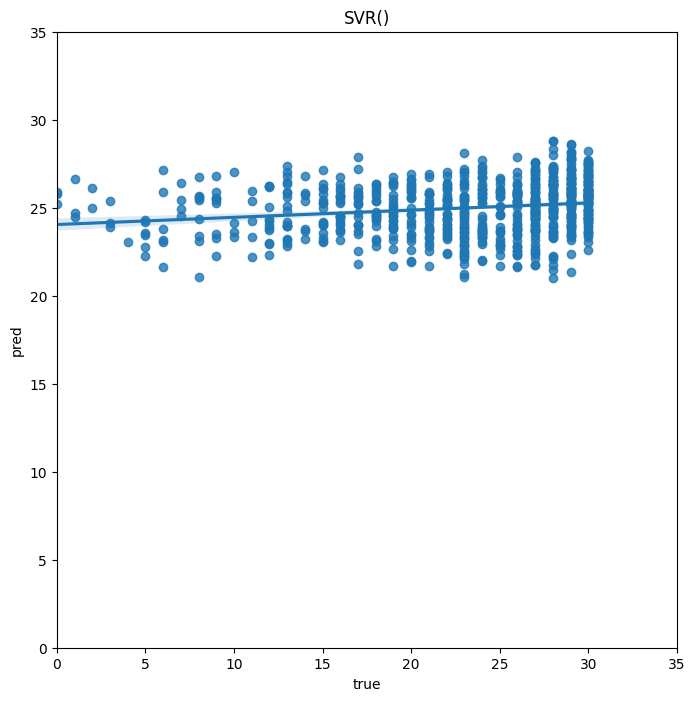

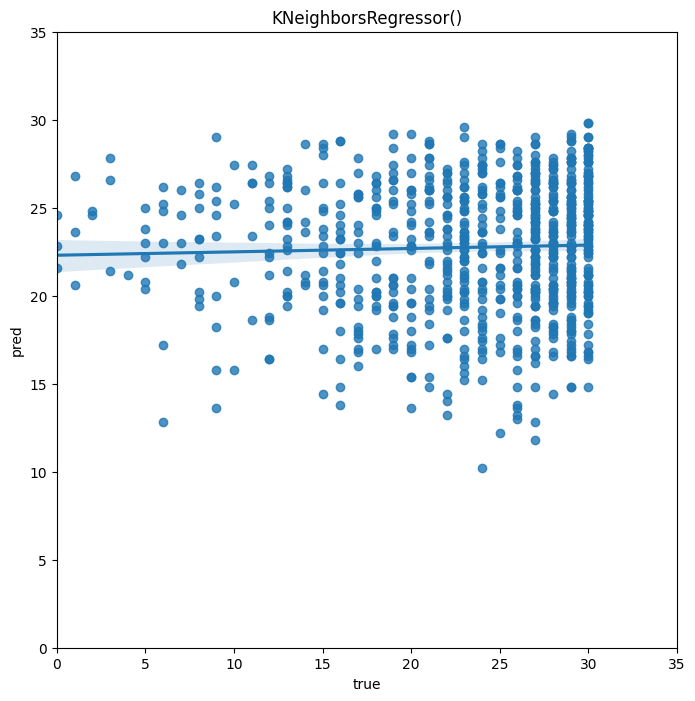

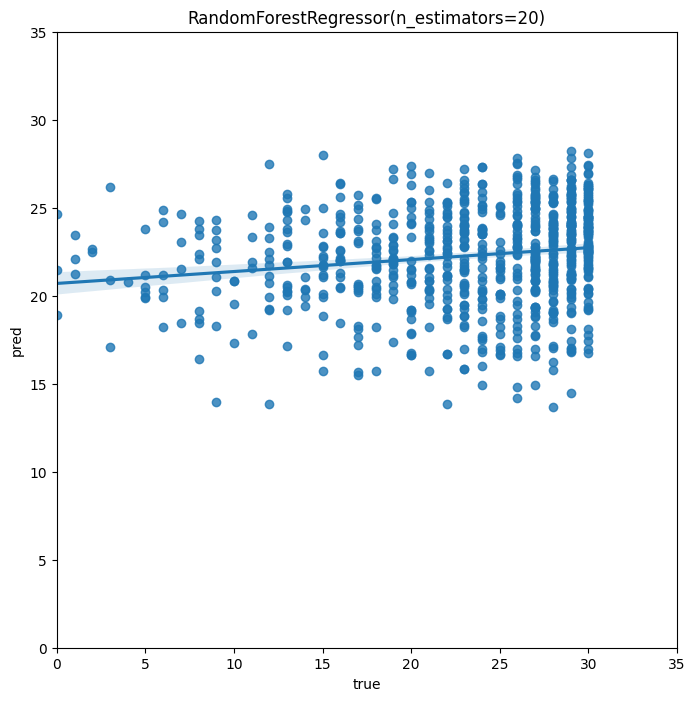

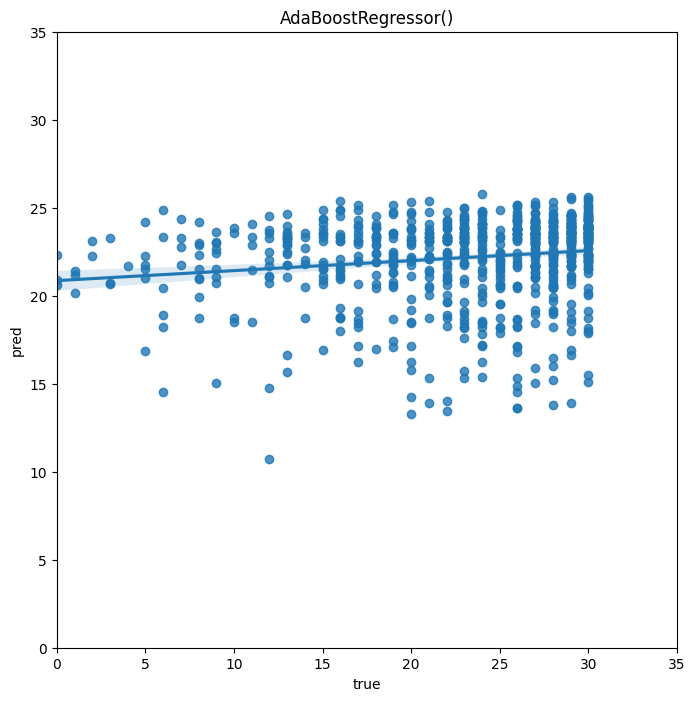

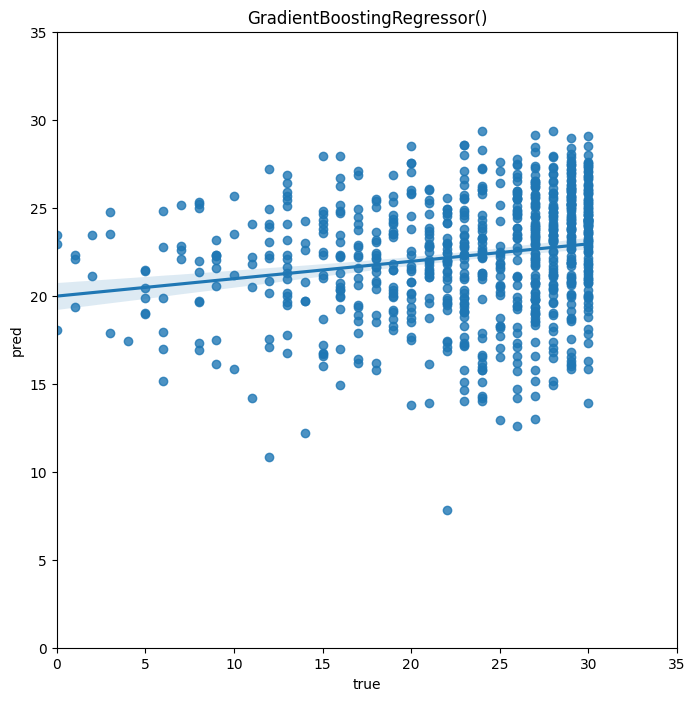

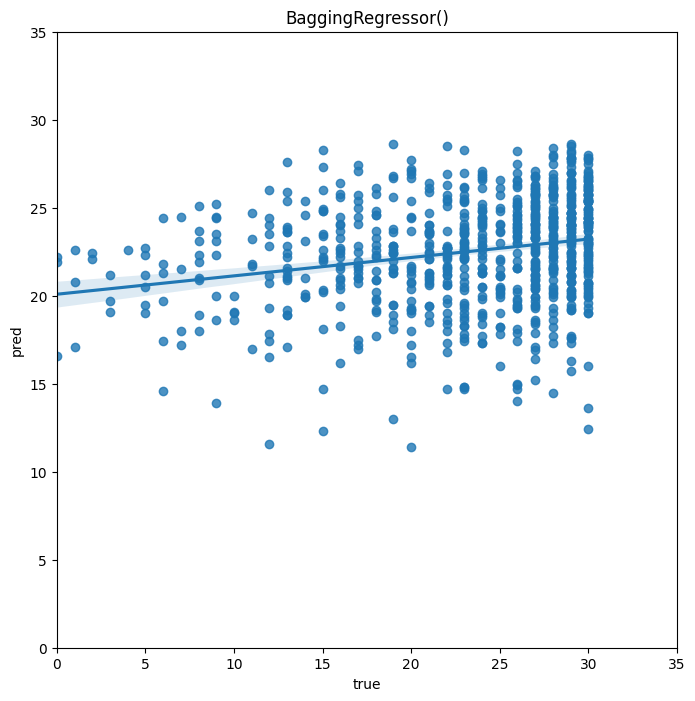

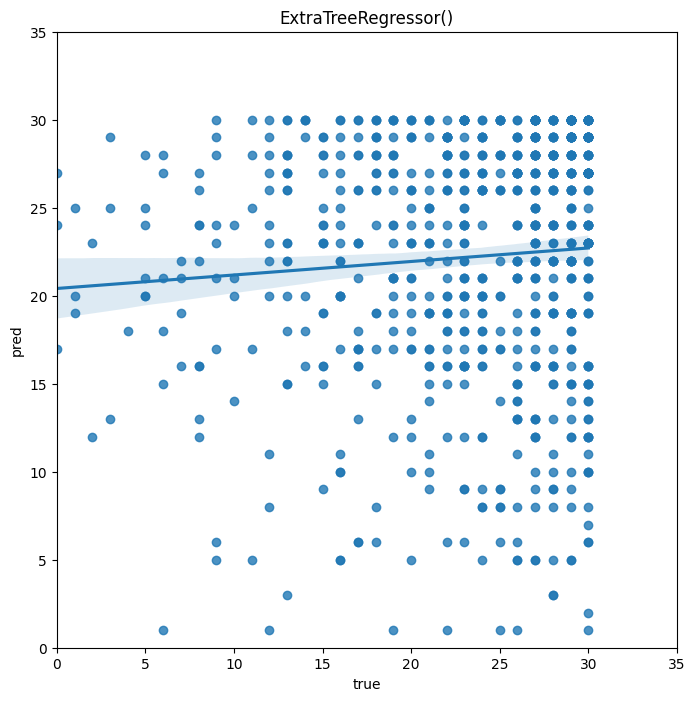

/home/syb/anaconda3/envs/coupling/lib/python3.8/site-packages/scikit_learn-1.1.2-py3.8-linux-x86_64.egg/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/syb/anaconda3/envs/coupling/lib/python3.8/site-packages/scikit_learn-1.1.2-py3.8-linux-x86_64.egg/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/syb/anaconda3/envs/coupling/lib/python3.8/site-packages/scikit_learn-1.1.2-py3.8-linux-x86_64.egg/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/syb/anaconda3/envs/coupling/lib/python3.8/site-packages/scikit_learn-1.1.2-py3.8-linux-x86_64.egg/sklearn/neural_ne

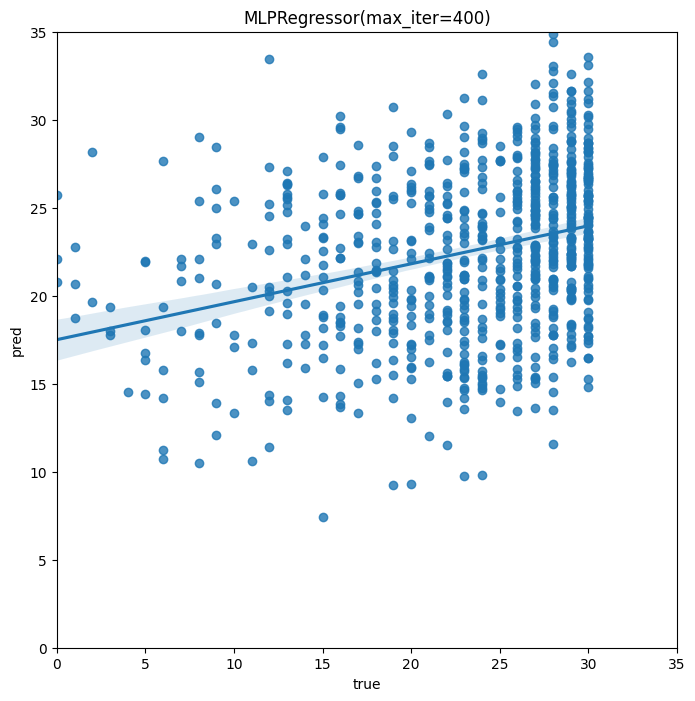

In [14]:
r2_re = []
y_pred_3 = []
y_true_3 = []

r_list = []
p_list = []

#计算三种模态各个的分类性能
for model_num in range(len(model_list)):
    y_pred_mode = []
    y_true_mode = []
    #fig, ax = plt.subplots(figsize=(3, 3))
    #把fa和info合并成一个表格
    df_sc1= pd.concat([df_mode[mode],df_info],join="outer",axis=1)
    for i in range(7):
        center = i+1
        df = df_sc1.sample(frac=1).reset_index(drop=True)
        #df = df[df['label'] !=2]
        #df = df['label'].replace(3,0)
        
        #df.loc[df['label']==3,'label'] = 0
        df_test = df[df['center']== center].drop(axis=1,columns=['center','label'])
        df_train = df[df['center'] != center].drop(axis=1,columns=['center','label'])
        
        y_test = df_test['mmse'].values
        y_train = df_train['mmse'].values
        x_test = df_test.drop(axis=1,columns=['mmse']).values
        x_train = df_train.drop(axis=1,columns=['mmse']).values

        
        model = model_list[model_num]
        model.fit(x_train,y_train)
        y_pred = model.predict(x_test)

        y_pred_mode.extend(y_pred)
        y_true_mode.extend(y_test)
        r2_re.append(pearsonr(y_pred,y_test)[0])

    y_pred_3.append(y_pred_mode)
    y_true_3.append(y_true_mode)
    r_list.append(pearsonr(y_pred_mode,y_true_mode)[0])
    p_list.append(pearsonr(y_pred_mode,y_true_mode)[0])

    fig, ax = plt.subplots(figsize=(8, 8))

    df_y = pd.DataFrame( data= np.transpose([y_pred_mode,y_true_mode]), columns=['pred','true'])
    

    sns.regplot(data= df_y, x='true',y= 'pred')
    
    modelName = str(model)

    #plt.scatter(y_true_mode,y_pred_mode)

    rp = pearsonr(y_pred_mode,y_true_mode)

    plt.xlim([0,35])
    plt.ylim([0,35])
    plt.title(modelName+', r= '+ str(rp[0]), +', p = '+ str(rp[1]))
    plt.show()




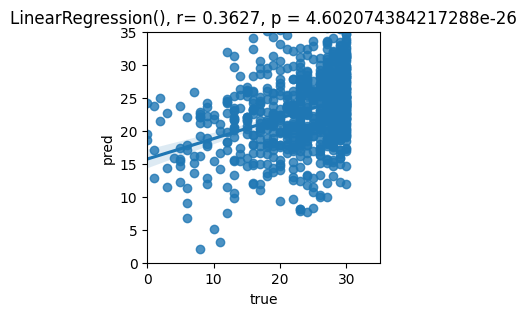

In [7]:
r2_re = []
y_pred_3 = []
y_true_3 = []

r_list = []
p_list = []
mode = 0

#计算三种模态各个的分类性能
for mode in range(1):
    y_pred_mode = []
    y_true_mode = []
    #fig, ax = plt.subplots(figsize=(3, 3))
    #把fa和info合并成一个表格
    df_sc1= pd.concat([df_mode[mode],df_info],join="outer",axis=1)
    for i in range(7):
        center = i+1
        df = df_sc1.sample(frac=1).reset_index(drop=True)
        #df = df[df['label'] !=2]
        #df = df['label'].replace(3,0)
        
        #df.loc[df['label']==3,'label'] = 0
        df_test = df[df['center']== center].drop(axis=1,columns=['center','label'])
        df_train = df[df['center'] != center].drop(axis=1,columns=['center','label'])
        
        y_test = df_test['mmse'].values
        y_train = df_train['mmse'].values
        x_test = df_test.drop(axis=1,columns=['mmse']).values
        x_train = df_train.drop(axis=1,columns=['mmse']).values

        
        model = linear_model.LinearRegression()
        model.fit(x_train,y_train)
        y_pred = model.predict(x_test)

        y_pred_mode.extend(y_pred)
        y_true_mode.extend(y_test)
        r2_re.append(pearsonr(y_pred,y_test)[0])

    y_pred_3.append(y_pred_mode)
    y_true_3.append(y_true_mode)
    r_list.append(pearsonr(y_pred_mode,y_true_mode)[0])
    p_list.append(pearsonr(y_pred_mode,y_true_mode)[0])

    fig, ax = plt.subplots(figsize=(3, 3))

    df_y = pd.DataFrame( data= np.transpose([y_pred_mode,y_true_mode]), columns=['pred','true'])
    

    sns.regplot(data= df_y, x='true',y= 'pred')
    
    modelName = str(model)

    #plt.scatter(y_true_mode,y_pred_mode)

    rp = pearsonr(y_pred_mode,y_true_mode)
    
    
    plt.xlim([0,35])
    plt.ylim([0,35])
    
    #plt.title(modelName+', r= '+ str(round(rp[0],5)) +', p = '+ str(rp[1]))
    
    plt.show()




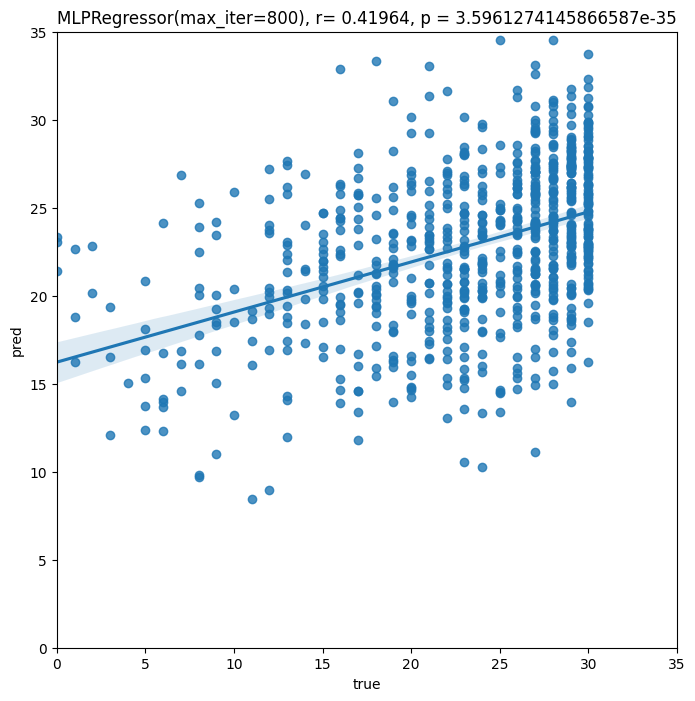

In [21]:
r2_re = []
y_pred_3 = []
y_true_3 = []

r_list = []
p_list = []
mode = 0

#计算三种模态各个的分类性能
for mode in range(1):
    y_pred_mode = []
    y_true_mode = []
    #fig, ax = plt.subplots(figsize=(3, 3))
    #把fa和info合并成一个表格
    df_sc1= pd.concat([df_mode[mode],df_info],join="outer",axis=1)
    for i in range(7):
        center = i+1
        df = df_sc1.sample(frac=1).reset_index(drop=True)
        #df = df[df['label'] !=2]
        #df = df['label'].replace(3,0)
        
        #df.loc[df['label']==3,'label'] = 0
        df_test = df[df['center']== center].drop(axis=1,columns=['center','label'])
        df_train = df[df['center'] != center].drop(axis=1,columns=['center','label'])
        
        y_test = df_test['mmse'].values
        y_train = df_train['mmse'].values
        x_test = df_test.drop(axis=1,columns=['mmse']).values
        x_train = df_train.drop(axis=1,columns=['mmse']).values

        
        model = MLPRegressor(max_iter= 800)
        model.fit(x_train,y_train)
        y_pred = model.predict(x_test)

        y_pred_mode.extend(y_pred)
        y_true_mode.extend(y_test)
        r2_re.append(pearsonr(y_pred,y_test)[0])

    y_pred_3.append(y_pred_mode)
    y_true_3.append(y_true_mode)
    r_list.append(pearsonr(y_pred_mode,y_true_mode)[0])
    p_list.append(pearsonr(y_pred_mode,y_true_mode)[0])

    fig, ax = plt.subplots(figsize=(8, 8))

    df_y = pd.DataFrame( data= np.transpose([y_pred_mode,y_true_mode]), columns=['pred','true'])
    

    sns.regplot(data= df_y, x='true',y= 'pred')
    
    modelName = str(model)

    #plt.scatter(y_true_mode,y_pred_mode)

    rp = pearsonr(y_pred_mode,y_true_mode)
    
    
    plt.xlim([0,35])
    plt.ylim([0,35])
    
    plt.title(modelName+', r= '+ str(round(rp[0],5)) +', p = '+ str(rp[1]))
    plt.show()




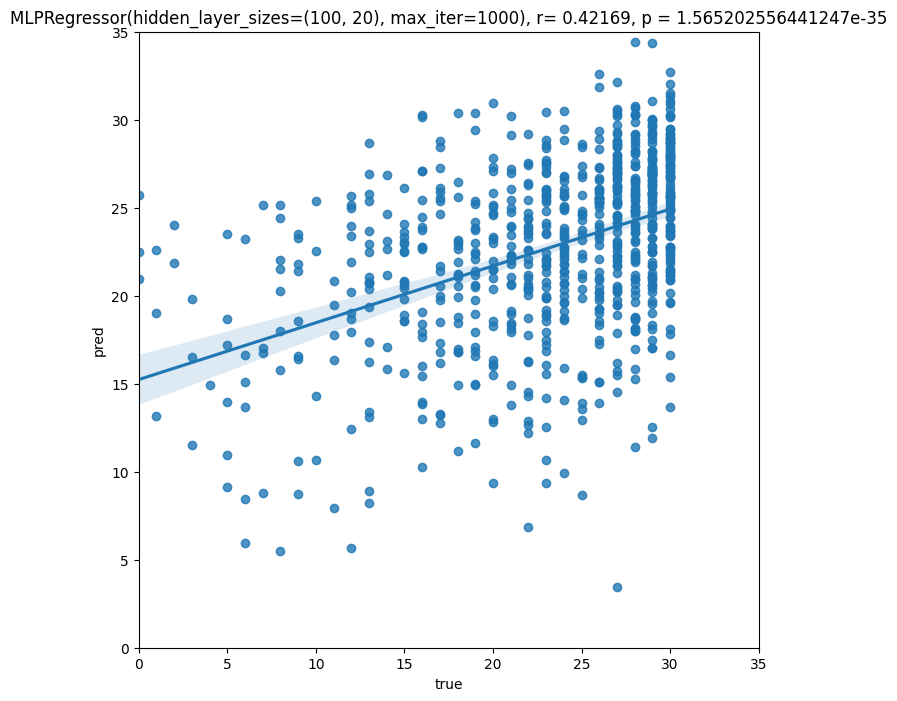

In [22]:
r2_re = []
y_pred_3 = []
y_true_3 = []

r_list = []
p_list = []
mode = 0

#计算三种模态各个的分类性能
for mode in range(1):
    y_pred_mode = []
    y_true_mode = []
    #fig, ax = plt.subplots(figsize=(3, 3))
    #把fa和info合并成一个表格
    df_sc1= pd.concat([df_mode[mode],df_info],join="outer",axis=1)
    for i in range(7):
        center = i+1
        df = df_sc1.sample(frac=1).reset_index(drop=True)
        #df = df[df['label'] !=2]
        #df = df['label'].replace(3,0)
        
        #df.loc[df['label']==3,'label'] = 0
        df_test = df[df['center']== center].drop(axis=1,columns=['center','label'])
        df_train = df[df['center'] != center].drop(axis=1,columns=['center','label'])
        
        y_test = df_test['mmse'].values
        y_train = df_train['mmse'].values
        x_test = df_test.drop(axis=1,columns=['mmse']).values
        x_train = df_train.drop(axis=1,columns=['mmse']).values

        
        model = MLPRegressor(max_iter= 1000,hidden_layer_sizes=(100,20))
        model.fit(x_train,y_train)
        y_pred = model.predict(x_test)

        y_pred_mode.extend(y_pred)
        y_true_mode.extend(y_test)
        r2_re.append(pearsonr(y_pred,y_test)[0])

    y_pred_3.append(y_pred_mode)
    y_true_3.append(y_true_mode)
    r_list.append(pearsonr(y_pred_mode,y_true_mode)[0])
    p_list.append(pearsonr(y_pred_mode,y_true_mode)[0])

    fig, ax = plt.subplots(figsize=(8, 8))

    df_y = pd.DataFrame( data= np.transpose([y_pred_mode,y_true_mode]), columns=['pred','true'])
    

    sns.regplot(data= df_y, x='true',y= 'pred')
    
    modelName = str(model)

    #plt.scatter(y_true_mode,y_pred_mode)

    rp = pearsonr(y_pred_mode,y_true_mode)
    
    
    plt.xlim([0,35])
    plt.ylim([0,35])
    
    plt.title(modelName+', r= '+ str(round(rp[0],5)) +', p = '+ str(rp[1]))
    plt.show()
